In [1]:

import kagglehub
rohitgrewal_airlines_flights_data_path = kagglehub.dataset_download('rohitgrewal/airlines-flights-data')

print('Data source import complete.')


Data source import complete.


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [3]:
df = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")

df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


# Q.1. What are the airlines in the dataset, accompanied by their frequencies?

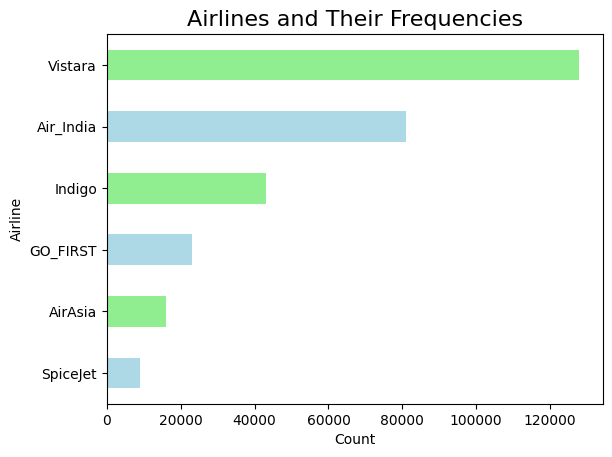

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df['airline'].value_counts()

df['airline'].value_counts(ascending =True).plot.barh(color = ['lightblue', 'lightgreen'])

plt.title('Airlines and Their Frequencies', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

# Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

In [6]:
for col in ['departure_time', 'arrival_time']:
    print(col)
    print(df[col].unique())

departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


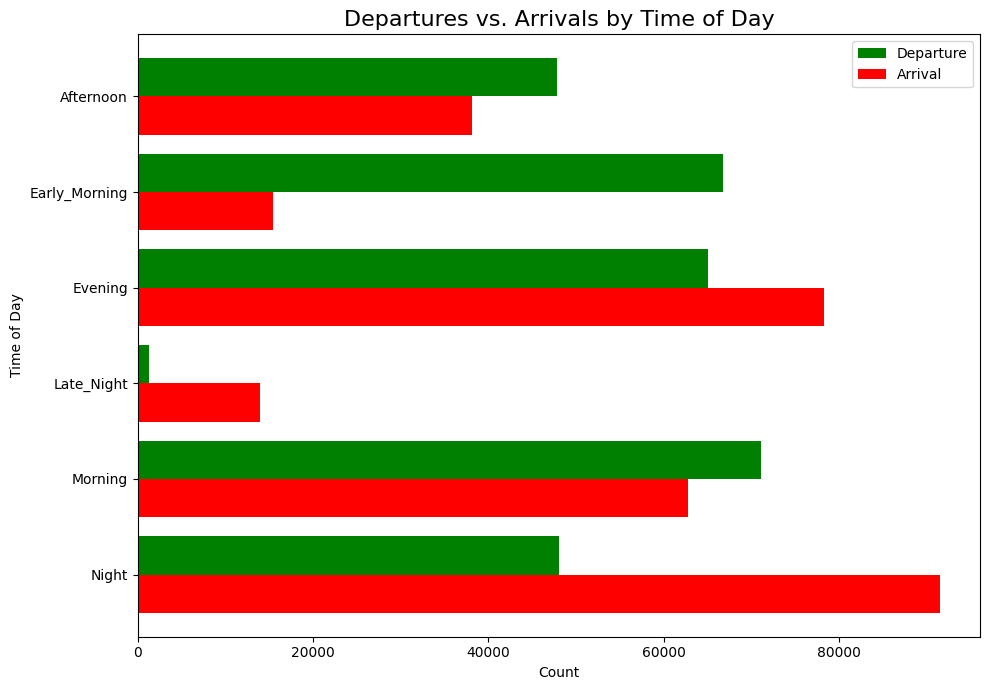

In [7]:


combined_counts = pd.DataFrame({
    'Departure': df['departure_time'].value_counts(),
    'Arrival': df['arrival_time'].value_counts()
})


combined_counts.plot.barh(
    figsize=(10, 7),
    color=['g', 'r'], # Set your colors
    width=0.8
)

plt.title('Departures vs. Arrivals by Time of Day', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Time of Day')
plt.gca().invert_yaxis() # Flips the y-axis to show Early_Morning at the top
plt.tight_layout()
plt.show()

# Q.3. Show Bar Graphs representing the Source City & Destination City.

In [8]:
for col in ['source_city', 'destination_city']:
    print(col)
    print(df[col].unique())

source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


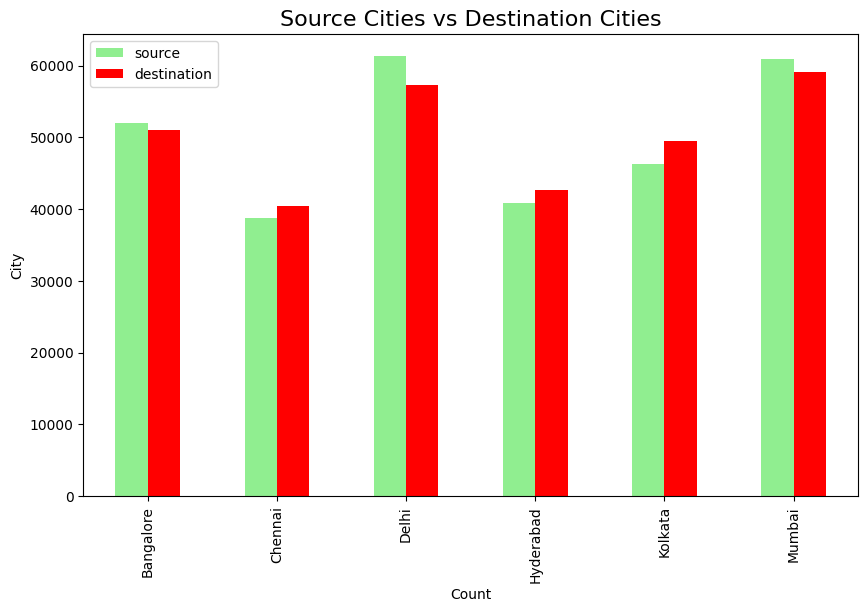

In [9]:
combined_cities = pd.DataFrame({
    'source' : df['source_city'].value_counts(),
    'destination' : df ['destination_city'].value_counts()
})

ax = combined_cities.plot.bar(
    figsize = (10, 6),
    color = ['lightgreen', 'r']
)


plt.title('Source Cities vs Destination Cities', fontsize=16)
plt.xlabel('Count')
plt.ylabel('City')
plt.show()



# Q.4. Does price varies with airlines ?